In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [52]:
X_train = np.linspace(-1,1,20)

## GENERATE DATA

In [53]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [54]:
X_test = np.linspace(-1,1,20)

In [55]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

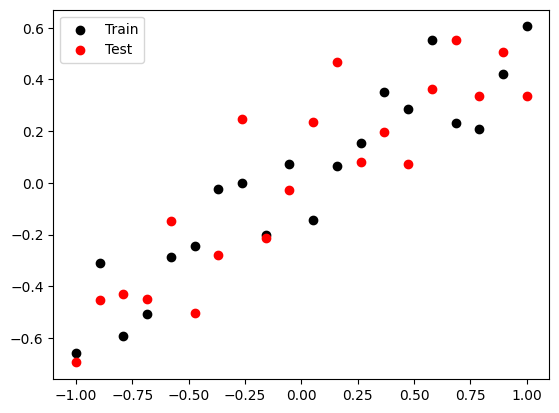

In [56]:
plt.scatter(X_train,y_train, c='black', label = 'Train')
plt.scatter(X_test,y_test, c='red', label = 'Test')
plt.legend()
plt.show()

## REGRESSION MODEL

In [57]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer= adam , metrics=['mse'])

history = model.fit(X_train,y_train,epochs=500,
                    validation_data=(X_test,y_test),
                    verbose=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
#evaluate the model
_, train_mse = model.evaluate(X_train,y_train, verbose=0)
_, test_mse = model.evaluate(X_test,y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004097853787243366, Test: 0.047332294285297394


In [59]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


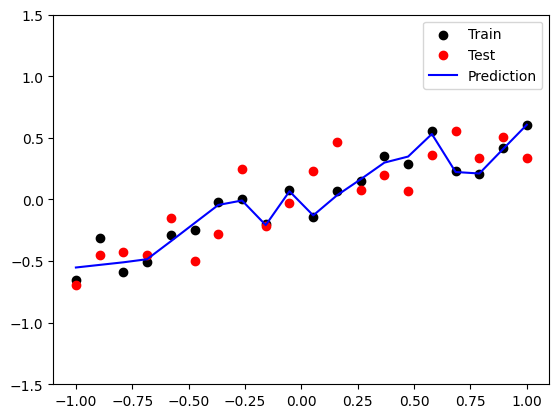

In [60]:
plt.figure()
plt.scatter(X_train, y_train, c='black',label ='Train')
plt.scatter(X_test, y_test, c='red',label ='Test')
plt.plot(X_test, y_pred, c='blue',label ='Prediction')
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

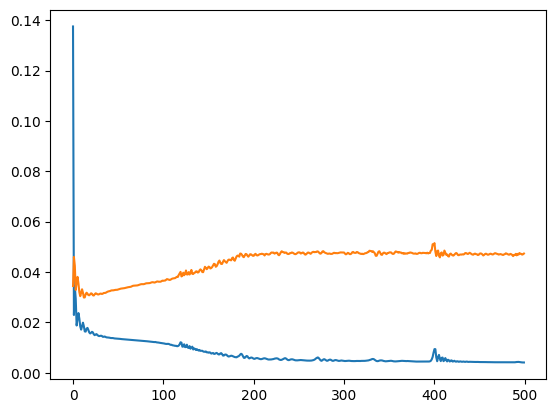

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

DROPOUT  MODEL

In [62]:
model_1 = Sequential()

model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dropout(0.2))

model_1.add(Dense(128, activation="relu"))
model_1.add(Dropout(0.2))

model_1.add(Dense(1,activation="linear"))

adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer= adam , metrics=['mse'])

history1 = model_1.fit(X_train,y_train,epochs=500, validation_data=(X_test,y_test),verbose=False)

In [63]:
#evaluate the model
_, train_mse = model.evaluate(X_train,y_train, verbose=0)
_, test_mse = model.evaluate(X_test,y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004097853787243366, Test: 0.047332294285297394


In [64]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


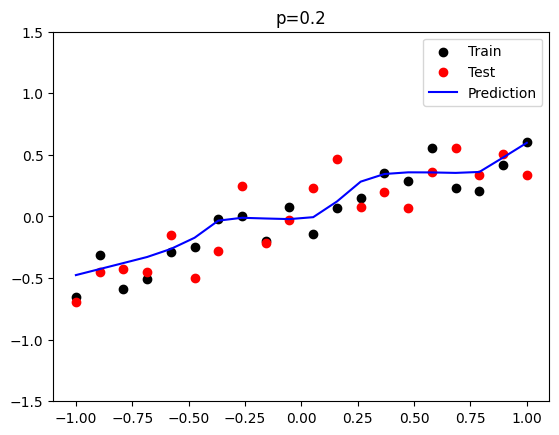

In [65]:
plt.figure()
plt.title('p=0.2')
plt.scatter(X_train, y_train, c='black',label ='Train')
plt.scatter(X_test, y_test, c='red',label ='Test')
plt.plot(X_test, y_pred_1, c='blue',label ='Prediction')
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

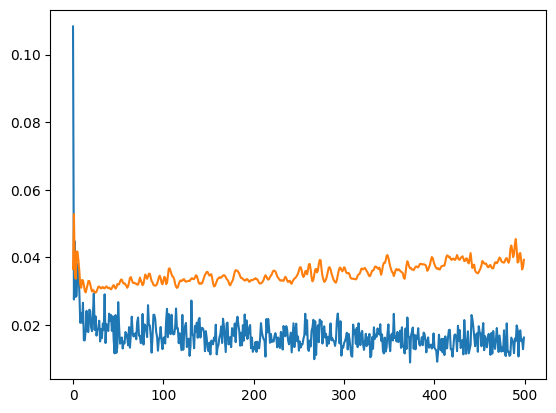

In [68]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])